<a href="https://colab.research.google.com/github/TanujRathore/digit-recognizer/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle kernels output tanujkumarrathore/notebookabdf02fac0 -p /path/to/dest

Output file downloaded to /path/to/dest/my_submission.csv
Kernel log downloaded to /path/to/dest/notebookabdf02fac0.log 


In [3]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 65.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 95.0MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [8]:
df_train  # image is gray scale with 28*28=784 (pixel array starts with zero)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.shape  # 784 is the total lenght of one image in matrix format + 'Label' 
# column with specified number.
#df_test.shape   # same as above.

(42000, 785)

In [10]:
Y=df_train.pop('label')
X=df_train

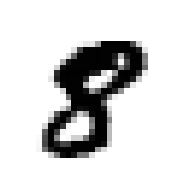

In [11]:
some_digit = np.array(X.iloc[10])  # this 10 example of train set.
# if we want to confirm that it is '8' or not then refer next cell
some_digit_image = some_digit.reshape(28, 28)

plt.figure(figsize=(3,3))
plt.axis("off")
plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [12]:
Y[10]

8

In [13]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
# normalization 
# Normalization is process in which we retrict the pixel value betn 0-255
# by dividing X_train=X-train/255
X=X/255

In [15]:
# after normalization
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
X_train.shape,X_test.shape  # after train_test split 33600 becomes train set and remaining 8400 
# becomes test set(also known as validation set)

((33600, 784), (8400, 784))

In [19]:
X_train=np.array(X_train).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)
X_train.shape

(33600, 28, 28, 1)

In [20]:
model=Sequential([Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')])

In [21]:
model.compile(
    optimizer=Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 24s 22ms/step - loss: 0.2046 - accuracy: 0.9374
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0627 - accuracy: 0.9807
Epoch 3/10
1050/1050 [==============================] - 22s 20ms/step - loss: 0.0397 - accuracy: 0.9871
Epoch 4/10
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 5/10
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0201 - accuracy: 0.9938
Epoch 6/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 7/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0119 - accuracy: 0.9957
Epoch 8/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 9/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 10/10
1050/1050 [==============================] - 21s 20m

In [23]:
model.evaluate(X_test,Y_test)

263/263 [==============================] - 2s 8ms/step - loss: 0.0704 - accuracy: 0.9849


[0.07038716971874237, 0.9848809242248535]

In [24]:
# Normalization of test set
df_test=df_test/255

In [25]:
df_test=np.array(df_test).reshape(-1,28,28,1)

In [26]:
y_pred=model.predict(df_test)
# every Y_pred is array of size 10 . because the last layer is softmax layer with 10 unit neuron
# so , for every test eaxample a array is generated (size=10) and for evvery digit there is probability value
# so the digit which has higher prob value is to be consider for that as  prdicted digit.

875/875 [==============================] - 7s 8ms/step


In [27]:
y_pred_output=[np.argmax(i) for i in y_pred]
# this y_pred_output has one value for every test case .

In [28]:
y_pred_output[:5]

[2, 0, 9, 0, 3]

In [30]:
sample=pd.read_csv('/content/sample_submission.csv')
i=sample.ImageId

output=pd.DataFrame({'ImageId':i,'Label': y_pred_output})
output.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [31]:
output.to_csv('my_submission.csv',index=False)